In [68]:
import pandas as pd
import numpy as np

import cv2
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

import os

import glob
from xml.etree import ElementTree

import matplotlib.pyplot as plt
from PIL import Image

import imageio

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from time import time

In [24]:
#William's laptop path
Overall_directory = '/Users/shiyuanliu/Desktop/Machine_learning/Final_project/pictures/archive'   #just change this line 
annotations_directory = Overall_directory + '/annotations'
images_directory = Overall_directory + '/images'
input_path = Overall_directory + '/Input'
input_path_rgb = Overall_directory + '/Input_RGB'
input_path_cnn = Overall_directory + '/adjusted_input_cnn'
input_path_svc = Overall_directory + '/adjusted_input_svc'
annotations_files = !ls ''
images_files = !ls '

In [ ]:
#Lexie's laptop path
Overall_directory = ''   #just change this line 
annotations_directory = Overall_directory + '/annotations'
images_directory = Overall_directory + '/images'
input_path = Overall_directory + '/Input'
input_path_rgb = Overall_directory + '/Input_RGB'
input_path_cnn = Overall_directory + '/adjusted_input_cnn'
input_path_svc = Overall_directory + '/adjusted_input_svc'
annotations_files = !ls ''
images_files = !ls ''

In [2]:
#Ginger's laptop path
Overall_directory = '/Users/ziyijiang/Desktop/Final_project/pictures/archive' 
annotations_directory = Overall_directory + '/annotations'
images_directory = Overall_directory + '/images'
input_path = Overall_directory + '/Input'
input_path_rgb = Overall_directory + '/Input_RGB'
input_path_cnn = Overall_directory + '/adjusted_input_cnn'
input_path_svc = Overall_directory + '/adjusted_input_svc'
annotations_files = !ls ''
images_files = !ls ''

In [3]:
print(len(annotations_files))
print(len(images_files))

1
1


In [4]:
information = {'xmin': [], 'ymin': [], 'xmax': [], 'ymax': [], 'label': [], 'file': [], 'width': [], 'height': []}
for annotation in glob.glob(annotations_directory + '/*.xml'):
    tree = ElementTree.parse(annotation)
    
    for element in tree.iter():
        if 'size' in element.tag:
            for attribute in list(element):
                if 'width' in attribute.tag: 
                    width = int(round(float(attribute.text)))
                if 'height' in attribute.tag:
                    height = int(round(float(attribute.text)))    

        if 'object' in element.tag:
            for attribute in list(element):
                
                if 'name' in attribute.tag:
                    name = attribute.text                 
                    information['label'] += [name]
                    information['width'] += [width]
                    information['height'] += [height] 
                    information['file'] += [annotation.split('/')[-1][0:-4]] 
                            
                if 'bndbox' in attribute.tag:
                    for dimension in list(attribute):
                        if 'xmin' in dimension.tag:
                            xmin = int(round(float(dimension.text)))
                            information['xmin'] += [xmin]
                        if 'ymin' in dimension.tag:
                            ymin = int(round(float(dimension.text)))
                            information['ymin'] += [ymin]                                
                        if 'xmax' in dimension.tag:
                            xmax = int(round(float(dimension.text)))
                            information['xmax'] += [xmax]                                
                        if 'ymax' in dimension.tag:
                            ymax = int(round(float(dimension.text)))
                            information['ymax'] += [ymax]

In [5]:
annotations_info_df = pd.DataFrame(information)
annotations_info_df.head(10)

,xmin,ymin,xmax,ymax,label,file,width,height
0,62,194,160,320,without_mask,maksssksksss299,301,400
1,43,169,149,308,without_mask,maksssksksss528,301,400
2,48,107,218,304,mask_weared_incorrect,maksssksksss272,275,400
3,28,78,43,99,with_mask,maksssksksss514,400,267
4,160,66,176,83,with_mask,maksssksksss514,400,267
5,174,33,186,52,with_mask,maksssksksss514,400,267
6,202,40,216,59,with_mask,maksssksksss514,400,267
7,237,41,248,58,without_mask,maksssksksss514,400,267
8,249,44,266,66,mask_weared_incorrect,maksssksksss514,400,267
9,298,38,311,54,with_mask,maksssksksss514,400,267


Build CNN

In [50]:
# Add Annotation and Image File Names
annotations_info_df['annotation_file'] = annotations_info_df['file'] + '.xml'
annotations_info_df['image_file'] = annotations_info_df['file'] + '.png'

# Tidy Grammatical Issue
annotations_info_df.loc[annotations_info_df['label'] == 'mask_weared_incorrect', 'label'] = 'mask_incorrectly_worn'
annotations_info_df_svc = annotations_info_df.copy()

In [49]:
annotations_info_df

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,62,194,160,320,without_mask,maksssksksss299,301,400,maksssksksss299.xml,maksssksksss299.png
1,43,169,149,308,without_mask,maksssksksss528,301,400,maksssksksss528.xml,maksssksksss528.png
2,48,107,218,304,mask_incorrectly_worn,maksssksksss272,275,400,maksssksksss272.xml,maksssksksss272.png
3,28,78,43,99,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png
4,160,66,176,83,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png
...,...,...,...,...,...,...,...,...,...,...
4067,271,73,278,82,without_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png
4068,236,91,243,99,without_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png
4069,236,76,243,83,without_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png
4070,264,76,268,82,with_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png


In [8]:
image_filepath = annotations_info_df['image_file'].iloc[0]
annotations_filepath = annotations_info_df['annotation_file'].iloc[0]
print(image_filepath)
print(annotations_filepath)
print(len(annotations_info_df))

maksssksksss299.png
maksssksksss299.xml
4072


In [9]:
image = cv2.imread(images_directory + '/' + image_filepath)
print(image)

[[[140 151 143]
  [143 150 146]
  [139 145 143]
  ...
  [149 166 164]
  [150 166 166]
  [151 168 168]]

 [[142 154 145]
  [141 148 144]
  [141 147 145]
  ...
  [151 167 166]
  [150 168 166]
  [151 168 168]]

 [[143 151 145]
  [141 147 143]
  [142 147 145]
  ...
  [151 168 167]
  [152 169 169]
  [155 170 170]]

 ...

 [[ 62  53  43]
  [ 72  60  52]
  [ 78  67  59]
  ...
  [ 26  27  19]
  [ 24  26  17]
  [ 23  25  17]]

 [[ 51  45  44]
  [ 51  42  43]
  [ 53  44  43]
  ...
  [ 27  29  20]
  [ 27  28  19]
  [ 27  29  19]]

 [[ 47  39  37]
  [ 47  40  38]
  [ 48  43  39]
  ...
  [ 27  29  19]
  [ 19  23  13]
  [ 12  15   8]]]


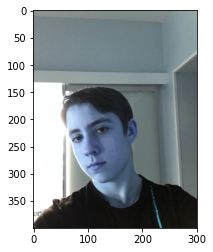

In [10]:
plt.imshow(image)
plt.show()

In [11]:
def convert_to_RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

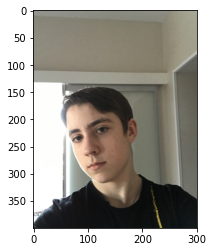

In [12]:
image = convert_to_RGB(image)
plt.imshow(image)
plt.show()
# print(image)

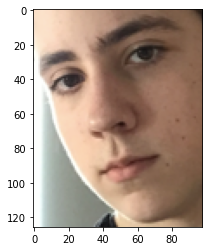

In [13]:
xmin = annotations_info_df['xmin'].iloc[0]
ymin = annotations_info_df['ymin'].iloc[0]
xmax = annotations_info_df['xmax'].iloc[0]
ymax = annotations_info_df['ymax'].iloc[0]

cropped = image[ymin:ymax, xmin:xmax]
plt.imshow(cropped)
plt.show()
# print(cropped)

In [14]:
print(np.shape(cropped))
print(type(cropped))
cropped = Image.fromarray(cropped)
print(np.shape(cropped))
cropped.save(input_path + '/new.png')

(126, 98, 3)
<class 'numpy.ndarray'>
(126, 98, 3)


In [15]:
#Main processing and saving
for i in range(len(annotations_info_df)):
    image_filepath = annotations_info_df['image_file'].iloc[i]
    image = cv2.imread(images_directory + '/' + image_filepath)
    image = convert_to_RGB(image)
    xmin = annotations_info_df['xmin'].iloc[i]
    ymin = annotations_info_df['ymin'].iloc[i]
    xmax = annotations_info_df['xmax'].iloc[i]
    ymax = annotations_info_df['ymax'].iloc[i]
    new_cropped = image[ymin:ymax, xmin:xmax]
    new_cropped = Image.fromarray(new_cropped)
    new_cropped.save(input_path_rgb + '/' + str(i) + '.png')

In [16]:
# Get minimum size
x_min_size = 500
y_min_size = 500

directory = input_path_rgb
for i in range(len(annotations_info_df)):
    im = imageio.imread(directory + '/' + str(i) + '.png')
    if x_min_size > im.shape[0]:
        x_min_size = im.shape[0]
    if y_min_size > im.shape[1]:
        y_min_size = im.shape[1]
print(x_min_size, y_min_size)

2 1


In [17]:
x_lst_test = []
y_lst_test = []
x_lst_train = []
y_lst_train = []


test_files = []
train_files = []

test_num = 305
train_num = 2750

#放到25*25，一共3055张图片
dim = (25,25)
count = 0
for i in range(len(annotations_info_df)):
    directory = input_path_rgb + '/' + str(i) + '.png'
    im = cv2.imread(directory)
    max_size = max(im.shape[0],im.shape[1])
    if 13 < im.shape[0] < 150 and 13 < im.shape[1] < 150:
        top = int((max_size - im.shape[0])*(1/2))
        bottom = max_size - im.shape[0] - top
        left = int((max_size - im.shape[1])*(1/2))
        right = max_size - im.shape[1] - left
        im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_REPLICATE)
        resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
        cv2.imwrite(input_path_cnn + '/' + str(i) + '.png',resized)
        if count <= test_num:
            test_files.append(i)
        else:
            train_files.append(i)
        count += 1
    
print(count)

3055


In [18]:
print(test_files)
print()
print(train_files)

[0, 1, 3, 4, 6, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 91, 92, 93, 95, 96, 97, 99, 100, 101, 102, 103, 104, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 241, 243, 244, 24

In [19]:
directory = input_path_cnn
for filename in test_files:
    im = imageio.imread(directory + '/' + str(filename) + '.png')
    im = np.array(im)
    im = np.reshape(im,(25,25,3))
    x_lst_test.append(im)
    if annotations_info_df['label'].iloc[filename] == 'without_mask':
        clsf = np.array([1, 0, 0])
    elif annotations_info_df['label'].iloc[filename] == 'mask_incorrectly_worn':
        clsf = np.array([0, 1, 0])
    elif annotations_info_df['label'].iloc[filename] == 'with_mask':
        clsf = np.array([0, 0, 1])
    y_lst_test.append(clsf)
    

for filename in train_files:
    im = imageio.imread(directory + '/' + str(filename) + '.png')
    im = np.array(im)
    im = np.reshape(im,(25,25,3))
    x_lst_train.append(im)
    if annotations_info_df['label'].iloc[filename] == 'without_mask':
        clsf = np.array([1, 0, 0])
    elif annotations_info_df['label'].iloc[filename] == 'mask_incorrectly_worn':
        clsf = np.array([0, 1, 0])
    elif annotations_info_df['label'].iloc[filename] == 'with_mask':
        clsf = np.array([0, 0, 1])
    y_lst_train.append(clsf)


x_train = np.array(x_lst_train)
y_train = np.array(y_lst_train)
x_test = np.array(x_lst_test)
y_test = np.array(y_lst_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2749, 25, 25, 3)
(2749, 3)
(306, 25, 25, 3)
(306, 3)


In [20]:
#Build CNN model
x_train = x_train/255

model = Sequential()

model.add(keras.layers.Conv2D(25, (3,3), padding='same', input_shape=(25,25,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=None))

model.add(keras.layers.Conv2D(50, (3,3), padding='same', input_shape=(25,25,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=None))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation="softmax"))




In [21]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# set up the optimize here
# Myoptimizer = Adam
#The training set and test set is prepared at the last code cell.
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [22]:
batch_size = 32
epochs = 30

history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.2)

Epoch 1/30
69/69 [==============================] - 1s 13ms/step - loss: 0.4606 - accuracy: 0.8299 - val_loss: 0.3456 - val_accuracy: 0.8709
Epoch 2/30
69/69 [==============================] - 1s 10ms/step - loss: 0.2541 - accuracy: 0.9204 - val_loss: 0.2176 - val_accuracy: 0.9382
Epoch 3/30
69/69 [==============================] - 1s 12ms/step - loss: 0.1843 - accuracy: 0.9413 - val_loss: 0.2086 - val_accuracy: 0.9418
Epoch 4/30
69/69 [==============================] - 1s 11ms/step - loss: 0.1681 - accuracy: 0.9436 - val_loss: 0.1925 - val_accuracy: 0.9327
Epoch 5/30
69/69 [==============================] - 1s 11ms/step - loss: 0.1625 - accuracy: 0.9441 - val_loss: 0.1968 - val_accuracy: 0.9291
Epoch 6/30
69/69 [==============================] - 1s 11ms/step - loss: 0.1473 - accuracy: 0.9500 - val_loss: 0.1836 - val_accuracy: 0.9327
Epoch 7/30
69/69 [==============================] - 1s 11ms/step - loss: 0.1430 - accuracy: 0.9504 - val_loss: 0.1809 - val_accuracy: 0.9400
Epoch 8/30
69

In [23]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 6ms/step - loss: 35.4649 - accuracy: 0.9150


[35.46493148803711, 0.915032684803009]

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

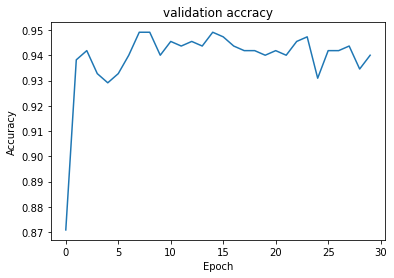

In [25]:
plt.plot(history.history['val_accuracy'])
plt.title('validation accracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

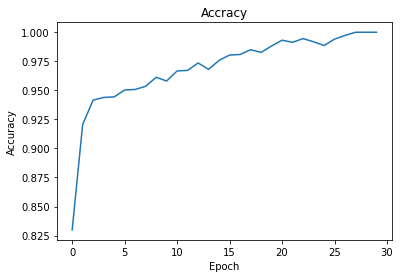

In [26]:
plt.plot(history.history['accuracy'])
plt.title('Accracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

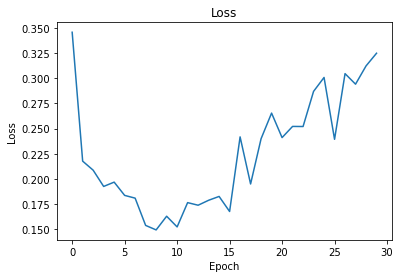

In [27]:
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Build Max Margin Classifier with PCA

In [51]:
def get_average_size():
    x_average = 0
    y_average = 0
    for i in range(len(annotations_info_df_svc)):
        xmin = annotations_info_df_svc['xmin'].iloc[i]
        ymin = annotations_info_df_svc['ymin'].iloc[i]
        xmax = annotations_info_df_svc['xmax'].iloc[i]
        ymax = annotations_info_df_svc['ymax'].iloc[i]
        x_average += (xmax-xmin)
        y_average += (ymax-ymin)
    
    x_average = int(x_average / len(annotations_info_df_svc))
    y_average = int(y_average / len(annotations_info_df_svc))
    
    return x_average,y_average

def padding_image(image):
    width = image.shape[1]
    height = image.shape[0]
    img_scale = height/width
    if img_scale > ratio:
        #padding horizontally
        ideal_width = int(height / ratio)
        diff = (ideal_width - width)//2
        image = cv2.copyMakeBorder(image,0,0,diff,diff,cv2.BORDER_REPLICATE)
    elif img_scale < ratio:
        #padding vertically
        ideal_height = int(width * ratio)
        diff = (ideal_height - height)//2
        image = cv2.copyMakeBorder(image,diff,diff,0,0,cv2.BORDER_REPLICATE)
    return image

def filter_images(image,i):
    xmin = annotations_info_df_svc['xmin'].iloc[i]
    ymin = annotations_info_df_svc['ymin'].iloc[i]
    xmax = annotations_info_df_svc['xmax'].iloc[i]
    ymax = annotations_info_df_svc['ymax'].iloc[i]
    print(type(ymin))
    
    if xmax - xmin > 20 and ymax - ymin >20:
        new_cropped = image[ymin:ymax,xmin:xmax]
        new_cropped = padding_image(new_cropped)
        new_cropped = cv2.resize(new_cropped,(x_ave,y_ave),interpolation=cv2.INTER_AREA)
        new_cropped = Image.fromarray(new_cropped)
        return new_cropped

In [52]:
annotations_info_df_svc.drop(annotations_info_df_svc[annotations_info_df_svc.label=='mask_incorrectly_worn'].index,inplace = True)
annotations_info_df_svc.dropna(inplace = True)
annotations_info_df_svc.reset_index(drop=True, inplace=True)
annotations_info_df_svc

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file
0,62,194,160,320,without_mask,maksssksksss299,301,400,maksssksksss299.xml,maksssksksss299.png
1,43,169,149,308,without_mask,maksssksksss528,301,400,maksssksksss528.xml,maksssksksss528.png
2,28,78,43,99,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png
3,160,66,176,83,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png
4,174,33,186,52,with_mask,maksssksksss514,400,267,maksssksksss514.xml,maksssksksss514.png
...,...,...,...,...,...,...,...,...,...,...
3944,271,73,278,82,without_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png
3945,236,91,243,99,without_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png
3946,236,76,243,83,without_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png
3947,264,76,268,82,with_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png


In [53]:
x_ave, y_ave = get_average_size()
ratio = x_ave / y_ave
print(x_ave,y_ave)

30 34


In [60]:
new_index = 0

for i in range(len(annotations_info_df_svc)):
    image_filepath = annotations_info_df_svc['image_file'].iloc[i]
    image = cv2.imread(images_directory + '/' + image_filepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = filter_images(image,i)
    if image != None:
        annotations_info_df_svc.loc[i,'new_img_file'] = str(new_index) + '.png'
        image.save(input_path_svc + '/' + str(new_index) + '.png')
        new_index += 1
    else:
        annotations_info_df_svc.loc[i,'new_img_file'] = pd.NA
        
annotations_info_df_svc.dropna(inplace = True)
annotations_info_df_svc.reset_index(drop=True, inplace=True)

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'nu

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'nu

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'nu

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'nu

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'nu

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'nu

In [61]:
annotations_info_df_svc

,xmin,ymin,xmax,ymax,label,file,width,height,annotation_file,image_file,new_img_file
0,62,194,160,320,without_mask,maksssksksss299,301,400,maksssksksss299.xml,maksssksksss299.png,0.png
1,43,169,149,308,without_mask,maksssksksss528,301,400,maksssksksss528.xml,maksssksksss528.png,1.png
2,113,230,216,368,with_mask,maksssksksss500,301,400,maksssksksss500.xml,maksssksksss500.png,2.png
3,74,205,180,330,with_mask,maksssksksss266,301,400,maksssksksss266.xml,maksssksksss266.png,3.png
4,101,174,209,299,without_mask,maksssksksss716,301,400,maksssksksss716.xml,maksssksksss716.png,4.png
...,...,...,...,...,...,...,...,...,...,...,...
2051,362,89,399,142,with_mask,maksssksksss257,400,267,maksssksksss257.xml,maksssksksss257.png,2051.png
2052,342,34,379,71,with_mask,maksssksksss257,400,267,maksssksksss257.xml,maksssksksss257.png,2052.png
2053,197,84,218,107,with_mask,maksssksksss280,400,267,maksssksksss280.xml,maksssksksss280.png,2053.png
2054,202,78,223,100,with_mask,maksssksksss294,400,241,maksssksksss294.xml,maksssksksss294.png,2054.png


In [62]:
revised_info_df = annotations_info_df_svc.copy()
img_data = np.ones((1,x_ave*y_ave))
for i in range(len(revised_info_df)):
    image_filepath = revised_info_df['new_img_file'].iloc[i]
    image = cv2.imread(input_path_svc + '/' + image_filepath)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img_data = np.vstack((img_data,image.reshape(1,-1)))

img_data = np.delete(img_data,0,0)

In [63]:
pca = PCA(n_components=13,whiten=True)
img_pca_reduced = pca.fit_transform(img_data)
print("reduced shape:",img_pca_reduced.shape)
img_pca_recovered = pca.inverse_transform(img_pca_reduced)
print("recovered shape:",img_pca_recovered.shape)
# plt.show(temp)

reduced shape: (2056, 13)
recovered shape: (2056, 1020)


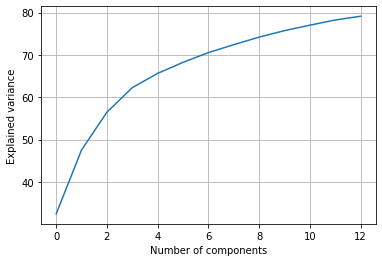

<Figure size 432x288 with 0 Axes>

In [64]:
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()
plt.savefig('Scree plot.png')

In [65]:
x = img_pca_reduced
y = np.array(revised_info_df["label"])
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=42)  

In [66]:
t0 = time()
param_grid = {
    "C": [1e3, 5e3, 1e4, 5e4, 1e5],
    "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}

clf = GridSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid)
clf = clf.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

done in 39.167s
Best estimator found by grid search:
SVC(C=10000.0, class_weight='balanced', gamma=0.005)


In [67]:
print("Predicting masks on the test set")
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

Predicting masks on the test set
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       438
           1       0.73      0.79      0.76        76

    accuracy                           0.93       514
   macro avg       0.85      0.87      0.86       514
weighted avg       0.93      0.93      0.93       514

